Melika Ahmadi Ranjbar 97521036

---
Homework 3


#Question 2

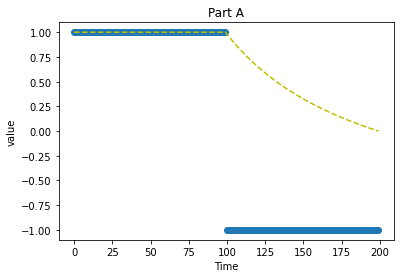

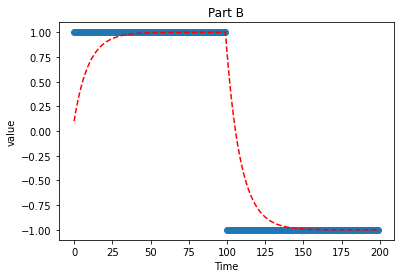

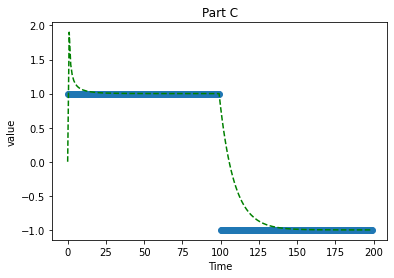

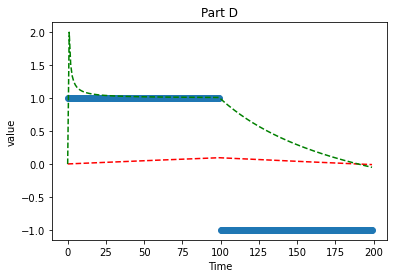

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Variable Initialization
D = np.ones(200)
Range = np.arange(200)

# Divide to +1 & -1
D[100:200] *= -1

# Sum
MeanA = np.cumsum(D)

# Part A
for X in range(200):
    MeanA[X] /= (X + 1)

# Plot
plt.title('Part A')
plt.scatter(Range, D)
plt.plot(Range, MeanA, '--y')
plt.xlabel('Time')
plt.ylabel('value')
plt.show()

# Part B
def CalPartB(Beta):
    MeanB = np.zeros(200)
    for X in range(200):
        if X is 0:
            MeanB[X] = (1 - Beta) * D[X]
        else:
            MeanB[X] = Beta * MeanB[X - 1] + (1 - Beta) * D[X]
    return MeanB

MeanB = CalPartB(0.9)

# Plot
plt.title('Part B')
plt.scatter(Range, D)
plt.plot(Range, MeanB, '--r')
plt.xlabel('Time')
plt.ylabel('value')
plt.show()

# Part C
def CalPartC(Beta, MeanB):
    MeanC = np.zeros(200)
    for X in range(200):
        if X is 0:
            MeanC[X] = 0
        else:
            MeanC[X] = MeanB[X] / (1 - pow(Beta, X))
    return MeanC

MeanC = CalPartC(0.9, MeanB)

# Plot
plt.title('Part C')
plt.scatter(Range, D)
plt.plot(Range, MeanC, '--g')
plt.xlabel('Time')
plt.ylabel('value')
plt.show()

# Part D
MeanBSecond = CalPartB(0.999)
MeanCSecond = CalPartC(0.999, MeanBSecond)

# Plot
plt.title('Part D')
plt.scatter(Range, D)
plt.plot(Range, MeanBSecond, '--r')
plt.plot(Range, MeanCSecond, '--g')
plt.xlabel('Time')
plt.ylabel('value')
plt.show()

#Question 3

4431872/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
211/211 [==============================] - 2s 5ms/step - loss: 0.6458 - accuracy: 0.7834 - val_loss: 0.4718 - val_accuracy: 0.8368
Epoch 2/50
211/211 [==============================] - 1s 5ms/step - loss: 0.4371 - accuracy: 0.8492 - val_loss: 0.4240 - val_accuracy: 0.8515
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 0.3968 - accuracy: 0.8618 - val_loss: 0.3830 - val_accuracy: 0.8632
Epoch 4/50
211/211 [===

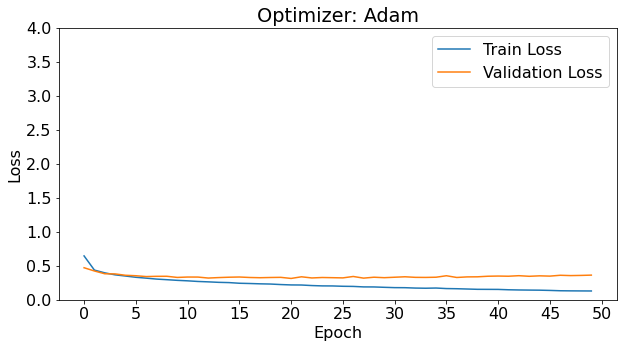

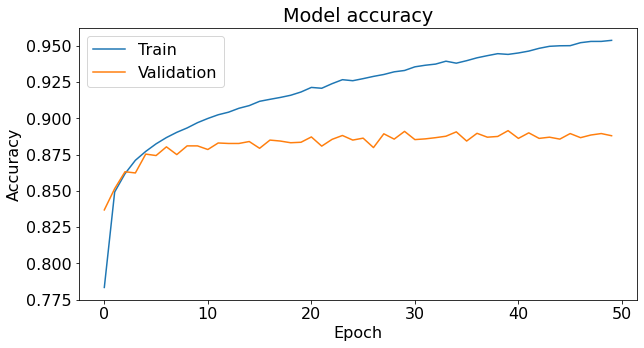

In [1]:
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Seeds
np.random.seed(100)
tf.random.set_seed(200)
random.seed(300)

# Set Variables
Loss = 'sparse_categorical_crossentropy'  
HiddenLayerNeuronCount = 128
LearningRate = 0.001
Iterations = 50
Categories = 10
Validation = 0.1

# Load Data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape, In Order To Give As Inputs
x_train =  x_train.reshape(60000, 28 * 28)
x_test = x_test.reshape(10000, 28 * 28)

# Model
Model = Sequential()
# Input Layer
Model.add(layers.Input((28 * 28)))
Model.add(layers.Dense(HiddenLayerNeuronCount, activation='relu'))
Model.add(layers.Dense(Categories, activation='softmax'))

Model.summary()

# Compile & Train
Optimizer = keras.optimizers.Adam(learning_rate=LearningRate)
Model.compile(optimizer=Optimizer, loss=Loss, metrics=['accuracy'])
History = Model.fit(x_train, y_train, 256, epochs=Iterations, validation_split=Validation)

print('*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')
# Evaluate Test Data
TestResult = Model.evaluate(x_test, y_test, 256)
print(TestResult[0] , 'Test Data Loss')
print(TestResult[1] * 100, '% Test Data Accuracy')


# Plot Loss
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(History.history['loss'], label='Train Loss')
plt.plot(History.history['val_loss'], label='Validation Loss')
x_ticks = np.arange(0, Iterations + 1, 5)
plt.xticks(x_ticks)
plt.ylim((0, 4))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Optimizer: Adam")
plt.legend(loc='upper right')
plt.show()

# Plot Accuracy
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['font.size'] = 16
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


